In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("results/dim_10_test_generic.csv")

In [3]:
tot_df = df[df.gradient_type == "total_deriv"]
tot_df

,n,d,n_types,sigma,q,seed,perturbation_s,perturbation_beta,final_loss,final_beta,gradient_type
0,1000000,10,10,1.109486,0.7,0,0.2,0.025,-2.091592,"[0.13859885596064359, -0.20261615702476715, -0...",total_deriv
2,1000000,10,10,1.089634,0.7,1,0.2,0.025,-2.242531,"[0.8632283542007049, -0.01843376348356801, 0.0...",total_deriv
4,1000000,10,10,1.198887,0.7,2,0.2,0.025,-1.954197,"[0.2951219327918343, 0.39541426012558895, 0.12...",total_deriv
6,1000000,10,10,0.714030,0.7,3,0.2,0.025,-2.079188,"[0.4779803015225142, -0.24049485461606313, 0.1...",total_deriv
8,1000000,10,10,1.270865,0.7,4,0.2,0.025,-2.201029,"[0.6695008051102733, -0.26878083988919466, -0....",total_deriv
10,1000000,10,10,0.820930,0.7,5,0.2,0.025,-1.931171,"[0.6038337364292027, 0.09875111794897971, 0.29...",total_deriv
12,1000000,10,10,1.216410,0.7,6,0.2,0.025,-1.994063,"[0.7003422553119565, 0.3198370509916451, 0.280...",total_deriv
14,1000000,10,10,1.241532,0.7,7,0.2,0.025,-2.103480,"[0.6969209721487243, -0.15012576408461856, -0....",total_deriv
16,1000000,10,10,1.552243,0.7,8,0.2,0.025,-1.967777,"[0.8608877179292124, -0.09549126818869533, 0.0...",total_deriv
18,1000000,10,10,0.878774,0.7,9,0.2,0.025,-1.868638,"[0.5626590918557052, -0.14083346529815333, -0....",total_deriv


In [4]:
partial_df = df[df.gradient_type == "partial_deriv_loss_beta"]
partial_df

,n,d,n_types,sigma,q,seed,perturbation_s,perturbation_beta,final_loss,final_beta,gradient_type
1,1000000,10,10,1.109486,0.7,0,0.2,0.025,-1.915094,"[0.3582102454763819, 0.33705699219946345, 0.32...",partial_deriv_loss_beta
3,1000000,10,10,1.089634,0.7,1,0.2,0.025,-1.971695,"[0.3645469482142871, 0.3346236568570561, 0.272...",partial_deriv_loss_beta
5,1000000,10,10,1.198887,0.7,2,0.2,0.025,-1.947519,"[0.3521815581293189, 0.26320658740413777, 0.33...",partial_deriv_loss_beta
7,1000000,10,10,0.714030,0.7,3,0.2,0.025,-1.772639,"[0.328315162486431, 0.33553373967526495, 0.320...",partial_deriv_loss_beta
9,1000000,10,10,1.270865,0.7,4,0.2,0.025,-1.921978,"[0.3661063040332934, 0.32287578255778326, 0.34...",partial_deriv_loss_beta
11,1000000,10,10,0.820930,0.7,5,0.2,0.025,-1.651068,"[0.35101998395881046, 0.2914782505070073, 0.30...",partial_deriv_loss_beta
13,1000000,10,10,1.216410,0.7,6,0.2,0.025,-1.859168,"[0.3435336736513052, 0.36376473048976377, 0.31...",partial_deriv_loss_beta
15,1000000,10,10,1.241532,0.7,7,0.2,0.025,-1.814525,"[0.3373528371848909, 0.35078895008170985, 0.24...",partial_deriv_loss_beta
17,1000000,10,10,1.552243,0.7,8,0.2,0.025,-1.702738,"[0.31460448587856216, 0.33331738555629625, 0.3...",partial_deriv_loss_beta
19,1000000,10,10,0.878774,0.7,9,0.2,0.025,-1.542931,"[0.2965838158978821, 0.3336432872880669, 0.363...",partial_deriv_loss_beta


In [5]:
y = tot_df["final_loss"].to_numpy().flatten()
x = partial_df["final_loss"].to_numpy().flatten()
diff = y - x
mean_diff = np.mean(diff)
std_diff = np.std(diff)
se = std_diff/np.sqrt(10)
T = mean_diff/se
T

-7.870343967701277

In [6]:
diff

array([-0.17649843, -0.27083596, -0.00667847, -0.30654946, -0.27905142,
       -0.28010303, -0.13489493, -0.28895503, -0.26503881, -0.32570726])

In [7]:
df1 = pd.read_csv("results/dim_10_test_generic_resample_seed_0_gradient_type_partial_deriv_loss_beta_train.csv")
df2 = pd.read_csv("results/dim_10_test_generic_resample_seed_0_gradient_type_total_deriv_train.csv")

In [8]:
def conversion_method(arr):
    l = []
    for s in arr:
        t = s[1:-1].split(", ")
        t = [float(x) for x in t]
        l.append(np.array(t).reshape(10, 1))
    return l

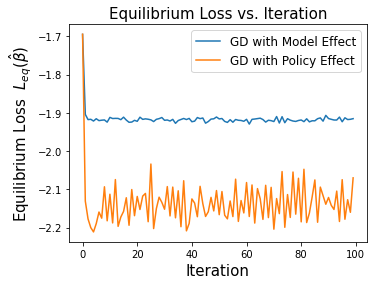

In [11]:
plt.figure(figsize=(16/3, 4))
plt.plot(df1["iteration"], df1["loss"], label="GD with Model Effect")
plt.plot(df2["iteration"], df2["loss"], label="GD with Policy Effect")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Equilibrium Loss  " + r"$L_{eq}(\hat{\beta})$", fontsize=15)
plt.legend(fontsize=12)
plt.title("Equilibrium Loss vs. Iteration", fontsize=15)
plt.savefig("figs/paper_plot_loss.pdf", bbox_inches='tight')

In [ ]:
params1 = conversion_method(df1["params"])
params2 = conversion_method(df2["params"])

In [ ]:
def all_norm(params):
    return [np.sqrt(np.sum(x ** 2)).item() for x in params]
    

In [ ]:
plt.plot(df1["iteration"], all_norm(params1), label=r"$\tau_{TE}$")
plt.xlabel("Iterations")
plt.ylabel(r"$|| \beta ||$")
plt.plot(df2["iteration"], all_norm(params2), label=r"$\tau_{DE}$")
plt.legend()
plt.title("Loss vs. Iteration")



In [ ]:
df_all = pd.read_csv("results/dim_10_test_generic.csv")

In [ ]:
df_all.groupby(["gradient_type"]).agg(["mean", "std"])